In [209]:
# importação das bibliotecas

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [210]:
# leitura dos dados de treino

train = pd.read_csv("titanic_train.csv", sep=',')

#                                          ANÁLISE EXPLORATÓRIA

In [211]:
# apresentar os 5 primeiros registros
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
# exibir informações acerca do DataFrame

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


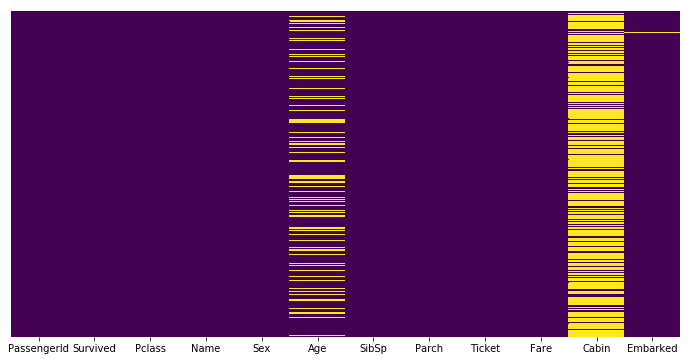

In [213]:
# visualização de dados faltantes

plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

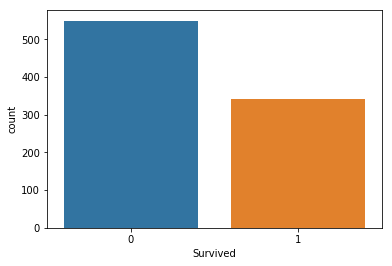

In [214]:
# plotar a quantidade de mortos(0) e vivos (1)

sns.countplot(x='Survived', data=train)

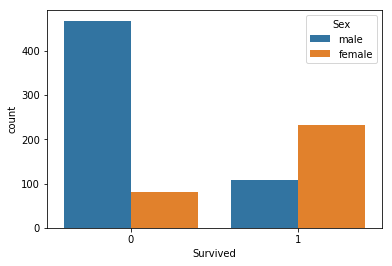

In [215]:
# plotar a quantidade de mortos(0) e vivos (1) a partir do sexo

sns.countplot(x='Survived', data=train, hue='Sex')

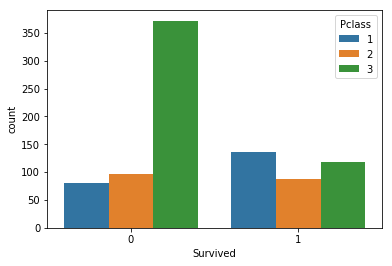

In [216]:
# plotar a quantidade de mortos(0) e vivos(1) a partir da classe

sns.countplot(x='Survived', data=train, hue='Pclass')

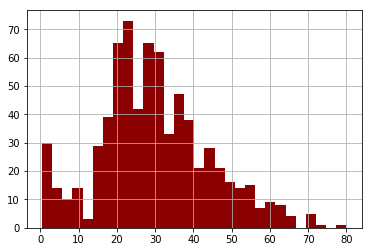

In [217]:
# histograma acerca da idade

train['Age'].hist(bins=30, color='darkred', alpha=1)

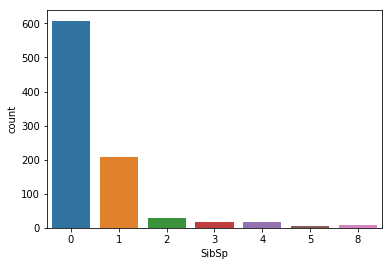

In [218]:
# plotar a quantidade de número de acompanhantes

sns.countplot(x='SibSp', data=train)

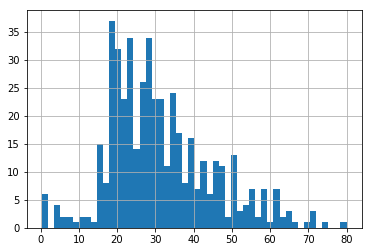

In [219]:
# plotar a quantidade de número de acompanhantes igual a 0 a partir da idade

train[train['SibSp'] == 0]['Age'].hist(bins=50)

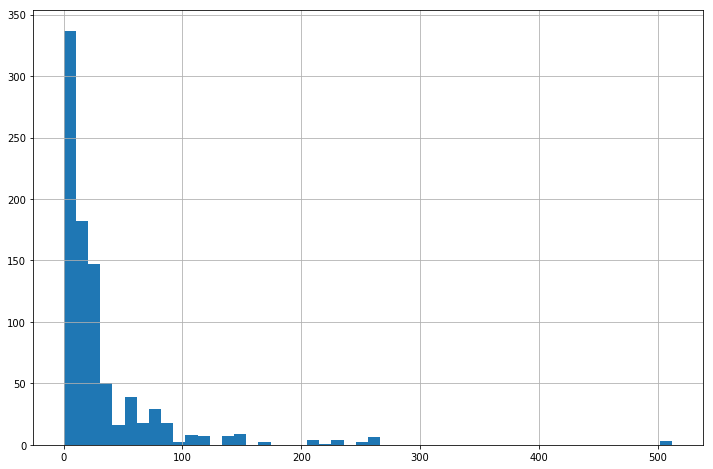

In [220]:
#plotar a quantidade de pessoas e preço que as pessoas pagaram

train['Fare'].hist(bins=50, figsize=(12,8))

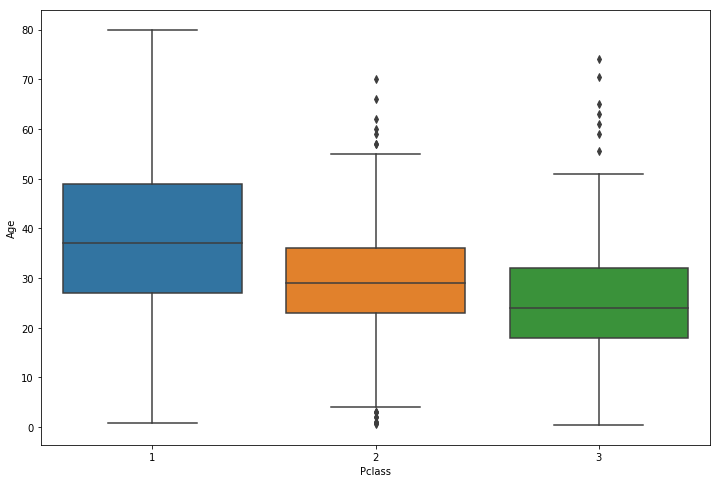

In [221]:
# Visualizar distribuição de idade por classes

plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train)

In [222]:
# preencher os dados faltantes com a média das idades das classes

def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [223]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)

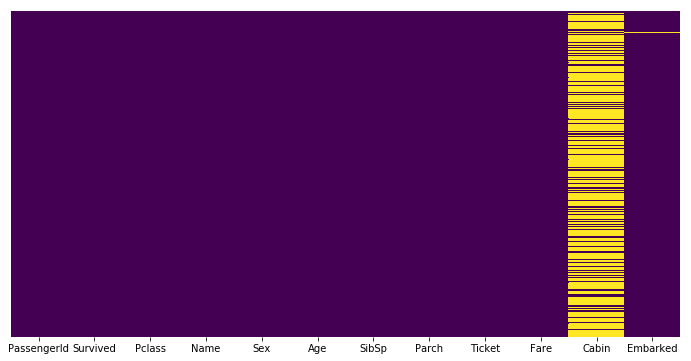

In [224]:
# visualização de dados faltantes em idade

plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [225]:
# por ter muitos dados faltantes, a cabine tornou-se obsolenta para esse caso.

train.drop('Cabin',axis=1,inplace=True)

In [226]:
# apagar a única linha faltante do DataFrame

train.dropna(inplace=True)

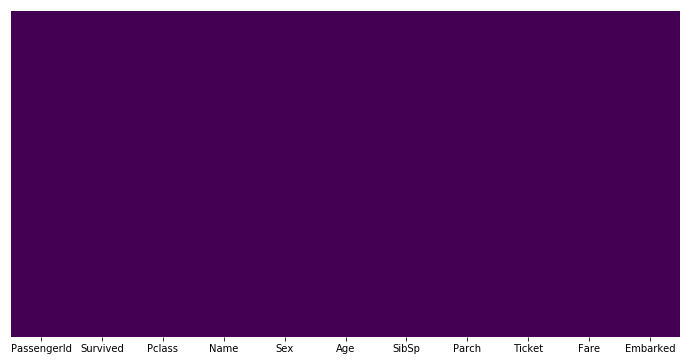

In [227]:
# visualização de dados faltantes 

plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [228]:
# Rotular em feminino(0) e masculino(1), tendo em vista que o modelo não lida com valores categóricos

sex = pd.get_dummies(train['Sex'], drop_first=True)

# Rotular o lugar que embarcou em Q(0) e S(1), tendo em vista que o modelo não lida com valores categóricos

embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [229]:
# deletando colunas que são irrelevantes

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [230]:
# concatenando o DataFrame com as colunas já tratadas

train = pd.concat([train,sex,embark],axis=1)

In [231]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# MODELO DE REGRESSÃO LOGÍSTICA

In [232]:
# importar a regressão logistica

from sklearn.linear_model import LogisticRegression

In [236]:
# quebrar os dados em dados de treino e teste

from sklearn.model_selection import train_test_split

In [239]:
# definindo x de treino e y de teste

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

In [241]:
# instancia a classe LogisticRegression para fitar o modelo

logmodel = LogisticRegression()

In [242]:
# fitando o modelo

logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [243]:
# predizer os inputs de teste e calculas os valores que o modelo ta dizendo que é verdade

prediction = logmodel.predict(X_test)

In [245]:
# verificar se o modelo é bom

from sklearn.metrics import classification_report

In [246]:
# resultado final do modelo

print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       165
          1       0.81      0.63      0.71       102

avg / total       0.80      0.80      0.80       267

